# Project 3: Data Cleaning — Airbnb NYC 2019

**Goal:** Clean the Airbnb NYC dataset by handling missing values, duplicates, outliers, and incorrect data types so it is ready for analysis.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries imported!')

Libraries imported!


## Step 2: Upload and Load the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

print('Shape of dataset:', df.shape)
df.head()

Shape of dataset: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Step 3: First Look at the Data

In [4]:
# See all column names and types
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [5]:
# Basic statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Check missing values in each column
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [7]:
# Check for duplicate rows
print('Duplicate rows:', df.duplicated().sum())

Duplicate rows: 0


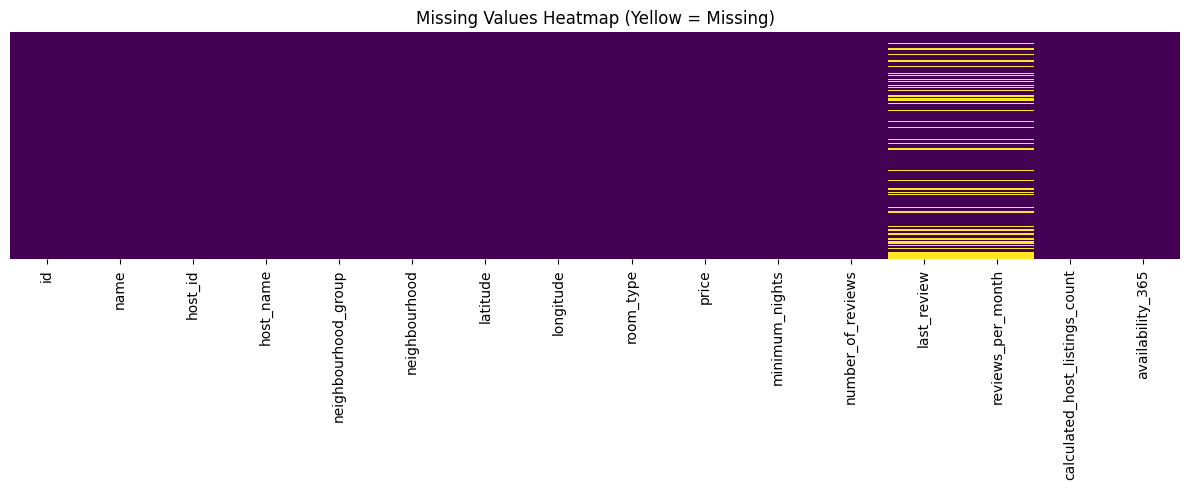

In [8]:
# Visualize missing values as a heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap (Yellow = Missing)')
plt.tight_layout()
plt.savefig('missing_values.png', dpi=150)
plt.show()

## Step 4: Handle Missing Values

In [9]:
# 'name' and 'host_name' — fill missing with 'Unknown'
df['name'] = df['name'].fillna('Unknown')
df['host_name'] = df['host_name'].fillna('Unknown')

# 'last_review' — fill missing with 'No Review'
df['last_review'] = df['last_review'].fillna('No Review')

# 'reviews_per_month' — fill missing with 0 (no reviews means 0 per month)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Confirm no more missing values
print('Missing values after cleaning:')
print(df.isnull().sum())

Missing values after cleaning:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## Step 5: Fix Data Types

In [10]:
# Convert last_review to a proper date (where possible)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Confirm data types
print(df.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


## Step 6: Remove Duplicates

In [11]:
before = len(df)
df = df.drop_duplicates()
after = len(df)

print('Rows before:', before)
print('Rows after :', after)
print('Removed    :', before - after, 'duplicate rows')

Rows before: 48895
Rows after : 48895
Removed    : 0 duplicate rows


## Step 7: Detect and Handle Outliers

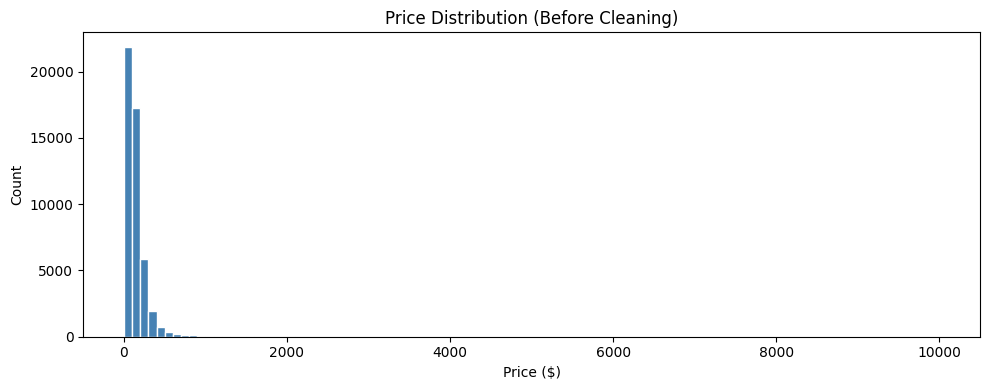

Max price: 10000
Listings with price = 0: 11


In [12]:
# Look at price distribution before cleaning
plt.figure(figsize=(10, 4))
plt.hist(df['price'], bins=100, color='steelblue', edgecolor='white')
plt.title('Price Distribution (Before Cleaning)')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('price_before.png', dpi=150)
plt.show()

print('Max price:', df['price'].max())
print('Listings with price = 0:', len(df[df['price'] == 0]))

In [13]:
# Remove listings with price = 0 (not valid)
df = df[df['price'] > 0]

# Remove extreme price outliers (above $1000 per night)
df = df[df['price'] <= 1000]

print('Rows after removing price outliers:', len(df))

Rows after removing price outliers: 48645


In [14]:
# Remove listings with unrealistic minimum nights (more than 365)
df = df[df['minimum_nights'] <= 365]

print('Rows after removing minimum_nights outliers:', len(df))

Rows after removing minimum_nights outliers: 48631


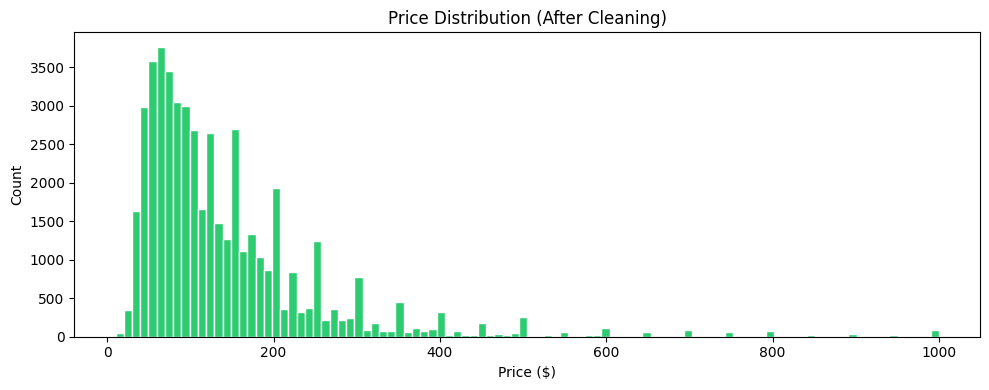

In [15]:
# Price distribution after cleaning
plt.figure(figsize=(10, 4))
plt.hist(df['price'], bins=100, color='#2ecc71', edgecolor='white')
plt.title('Price Distribution (After Cleaning)')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('price_after.png', dpi=150)
plt.show()

## Step 8: Standardize Text Columns

In [16]:
# Make sure text columns have consistent formatting
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip().str.title()
df['neighbourhood'] = df['neighbourhood'].str.strip().str.title()
df['room_type'] = df['room_type'].str.strip().str.title()

# Check unique values
print('Neighbourhood Groups:', df['neighbourhood_group'].unique())
print('Room Types:', df['room_type'].unique())

Neighbourhood Groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Room Types: ['Private Room' 'Entire Home/Apt' 'Shared Room']


## Step 9: Quick EDA on Clean Data

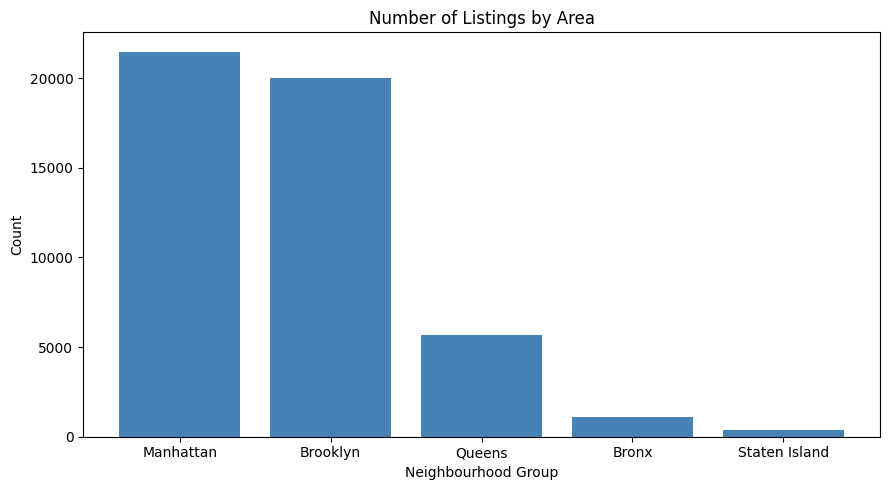

In [17]:
# Listings by neighbourhood group
area_counts = df['neighbourhood_group'].value_counts()

plt.figure(figsize=(9, 5))
plt.bar(area_counts.index, area_counts.values, color='steelblue')
plt.title('Number of Listings by Area')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('listings_by_area.png', dpi=150)
plt.show()

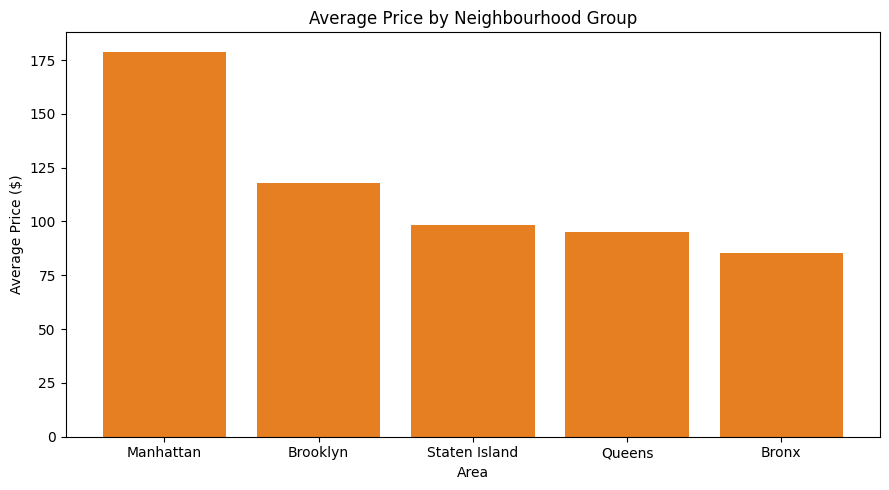

In [18]:
# Average price by neighbourhood group
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(9, 5))
plt.bar(avg_price.index, avg_price.values, color='#e67e22')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Area')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.savefig('avg_price_by_area.png', dpi=150)
plt.show()

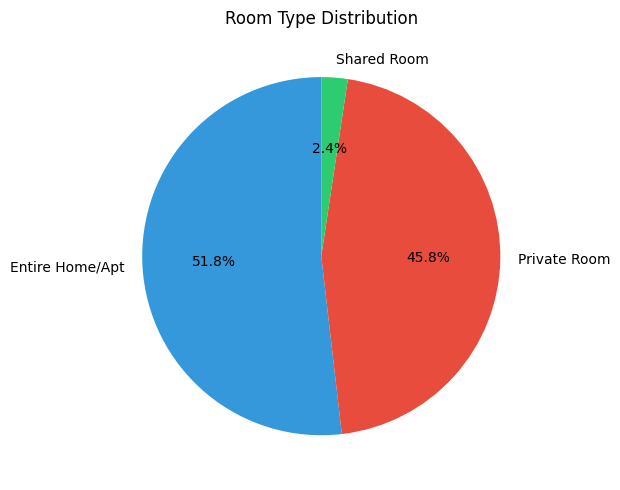

In [19]:
# Room type distribution
room_counts = df['room_type'].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(room_counts.values, labels=room_counts.index, autopct='%1.1f%%',
        colors=['#3498db', '#e74c3c', '#2ecc71'], startangle=90)
plt.title('Room Type Distribution')
plt.tight_layout()
plt.savefig('room_types.png', dpi=150)
plt.show()

<Figure size 900x500 with 0 Axes>

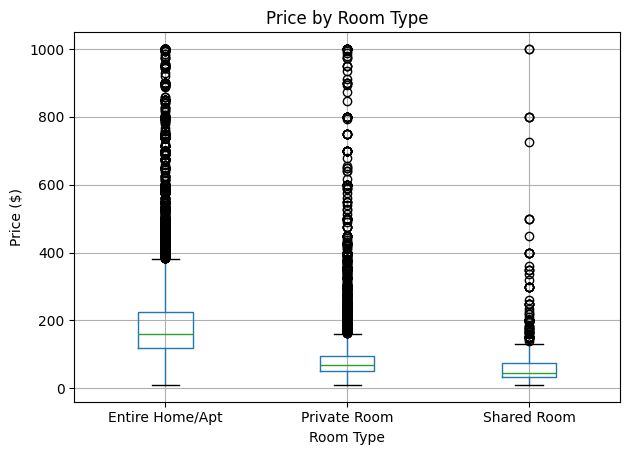

In [20]:
# Boxplot — price by room type
plt.figure(figsize=(9, 5))
df.boxplot(column='price', by='room_type')
plt.title('Price by Room Type')
plt.suptitle('')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.savefig('price_by_room.png', dpi=150)
plt.show()

## Step 10: Save the Cleaned Dataset

In [21]:
df.to_csv('AB_NYC_2019_cleaned.csv', index=False)
print('Cleaned dataset saved as AB_NYC_2019_cleaned.csv')

# Download it
from google.colab import files
files.download('AB_NYC_2019_cleaned.csv')

Cleaned dataset saved as AB_NYC_2019_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Step 11: Cleaning Summary

In [22]:
print('========== DATA CLEANING SUMMARY ==========')
print('Original rows          : 48,895')
print('Rows after cleaning    :', len(df))
print()
print('Issues Fixed:')
print('  - Filled missing name and host_name with Unknown')
print('  - Filled missing last_review with No Review')
print('  - Filled missing reviews_per_month with 0')
print('  - Converted last_review to proper date format')
print('  - Removed duplicate rows')
print('  - Removed listings with price = 0')
print('  - Removed price outliers above $1000')
print('  - Removed minimum_nights above 365')
print('  - Standardized text columns (strip + title case)')
print()
print('Dataset is now clean and ready for analysis!')

========== DATA CLEANING SUMMARY ==========
Original rows          : 48,895
Rows after cleaning    : 48631

Issues Fixed:
  - Filled missing name and host_name with Unknown
  - Filled missing last_review with No Review
  - Filled missing reviews_per_month with 0
  - Converted last_review to proper date format
  - Removed duplicate rows
  - Removed listings with price = 0
  - Removed price outliers above $1000
  - Removed minimum_nights above 365
  - Standardized text columns (strip + title case)

Dataset is now clean and ready for analysis!
